<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos_2021/blob/main/OLS_3_Transformaciones_Dummies_RegMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_author: Ricardo Pasquini (rpasquini@gmail.com)

En este notebook evaluaremos la transformación de la variable a explicar (transformación logarítmica), y exploraremos los efectos de la inclusión de variables explicativas adicionales. 

# Instalacion e Importacion de Librerias



In [3]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.0MB/s 
     |████████████████████████████████| 6.6MB 27.4MB/s 
     |████████████████████████████████| 15.4MB 185kB/s 


In [4]:
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np   #libreria con operaciones matematicas

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [6]:
departamentos.head()

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,l2,l3,l4,l5,l6,lat,lon,operation,operation_,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 1819-CRI180 ubicado en: Av. Callao 1...,None,2019-10-10,0,Argentina,Capital Federal,Recoleta,None,None,None,-34.588601,-58.388285,Alquiler,Alquiler,18000,Mensual,NaN,2019-09-26,52,58,b'Recoleta. Av. Callao y Av. Alvear. Piso alto...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,b'Residencia de estudiantes y viajeros. Son do...,None,2019-11-04,1,Argentina,Capital Federal,Balvanera,None,None,None,-34.606939,-58.393496,Alquiler,Alquiler,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,b'CODIGO: 1348-AF021227 ubicado en: Tacuari 26...,None,2019-09-28,2,Argentina,Capital Federal,Monserrat,None,None,None,-34.611352,-58.379205,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,b'Departamento de dos ambientes a 200 metros d...,None,2020-02-12,4,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,San Justo,None,None,-34.680777,-58.553166,Alquiler,Alquiler,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.240 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,b'CODIGO: 733-1600MARIANOA ubicado en: MARIANO...,None,2019-11-10,5,Argentina,Capital Federal,Villa Urquiza,None,None,None,-34.577983,-58.472185,Alquiler,Alquiler,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)


# OLS

Modelo:

$price_i=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [7]:
datos=departamentos[['price', 'bedrooms']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos.bedrooms
X=sm.add_constant(X)

In [8]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          7.68e-308
Time:                        20:39:52   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

# Funciones en Python

Una función que imprime un saludo


In [9]:
def hola(nombre):
  print("hola como te va "+nombre)


In [10]:
hola("juan carlos")

hola como te va juan carlos


Una función para sumar valores

In [11]:
def sumadosvalores(primervalor, segundovalor):
  resultado=primervalor+segundovalor
  return resultado #utilizamos return para especificar lo que queremos que la función devuelva

In [12]:
abcd=sumadosvalores(2,2)

In [13]:
abcd

4

Construimos una función para estimar la regresión \\
La función tomará dos argumentos: una lista de nombre de variables, y un dataframe donde encontrarlas y correr la regresión.
La lista de nombres tendrá primero al nombre de la variable a explicar y el resto serán las explicativas.  
La función se encargará de todos los pasos intermedios que vimos que son necesarios para correr la regresión: eliminar los missing, separar las variables, añadir la constante, etc.
Vamos a especificar que queremos que devuelva el resultado del método *fit*, que como vimos, es un objeto que incluye varios elementos de interés. 



In [14]:
def regress(lista, df):  
  datos=df[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  # lista[0] refiere al primer elemento de la lista, esto es, el nombre de la variable a explicar
  # del dataframe datos tomaremos solo la columna con el nombre de la variable a explicar para la variable Y
  Y=datos[lista[0]]
  # lista[1:] refiere al resto de los nombres incluidos en la  lista, esto es, a la lista de nombre de la variables que serán explicativas
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  # imprimimos en pantalla el resumen de resultados
  print(resultados.summary())
  # la funcion devolverá el objeto de resultados
  return resultados



A continuacion llamamos a la función regress. Va a imprimir los resultados, pero el resultado de fit no quedará guardado en ningun lado.

In [15]:
regress(['price','bedrooms'], departamentos)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          7.68e-308
Time:                        20:39:52   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

A continuación corro regress, pero también guardo el resultado de fit en la nueva variable (el objeto) que llamo resultados.

In [16]:
resultados=regress(['price', 'bedrooms'],departamentos)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          7.68e-308
Time:                        20:39:53   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

# Histrograma de Errores Estimados


In [17]:
resultados.predict()

array([15759.69772791, 20013.20447292, 15759.69772791, ...,
       28520.21796295, 15759.69772791, 20013.20447292])

In [18]:
datos.price-resultados.predict(X)

0         2240.302272
2        -1513.204473
4         2740.302272
43        -759.697728
45       -2759.697728
             ...     
50647    -9513.204473
50648     1740.302272
50650    11479.782037
50651   -11259.697728
50652    -7013.204473
Length: 27879, dtype: float64

$e=Y-Y^$

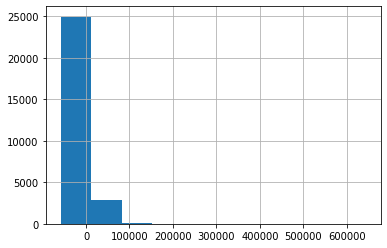

In [19]:
residuos=datos.price-resultados.predict(X)
residuos.hist()

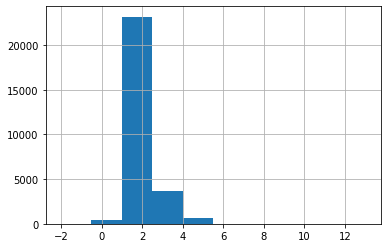

In [20]:
datos.bedrooms.hist()

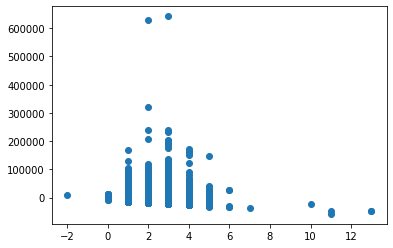

In [21]:
plt.scatter(datos.bedrooms,residuos)

#Transformación Logarítmica

Modelo propuesto:

$log(price_i)=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [22]:
np.log(datos.price)

0         9.798127
2         9.825526
4         9.825526
43        9.615805
45        9.472705
           ...    
50647     9.259131
50648     9.769956
50650    10.596635
50651     8.411833
50652     9.472705
Name: price, Length: 27879, dtype: float64

In [23]:
logY=np.log(Y)

In [24]:
departamentos['logprice']=np.log(departamentos.price)

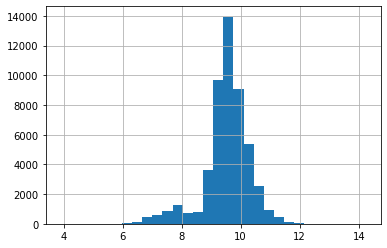

In [25]:
departamentos.logprice.hist(bins=30)

In [26]:
regress(['logprice','bedrooms'],departamentos)

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.53
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           9.96e-06
Time:                        20:39:54   Log-Likelihood:                -35268.
No. Observations:               27879   AIC:                         7.054e+04
Df Residuals:                   27877   BIC:                         7.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4810      0.011    841.888      0.0

In [27]:
logY=np.log(Y)

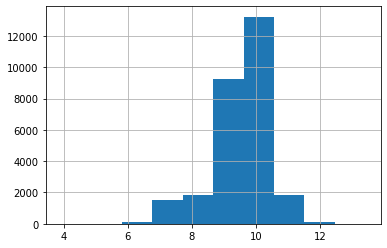

In [28]:
logY.hist()

In [29]:
modelo=sm.OLS(logY,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.53
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           9.96e-06
Time:                        20:39:54   Log-Likelihood:                -35268.
No. Observations:               27879   AIC:                         7.054e+04
Df Residuals:                   27877   BIC:                         7.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4810      0.011    841.888      0.0

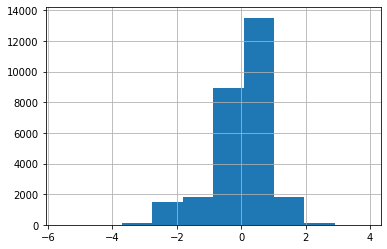

In [30]:
residuos2=logY-resultados.predict(X)
residuos2.hist()

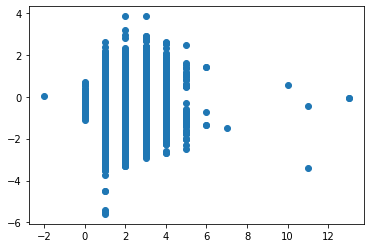

In [31]:
# scatterplot 

plt.scatter(datos.bedrooms,residuos2)

# Creacion de una dummy para el barrio de Palermo
Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*DPalermo+\epsilon_i$

Para este ejercicio solo estudiaremos los datos de CABA

In [32]:
departamentosCABA=departamentos.loc[departamentos['l2']=='Capital Federal']

In [33]:
departamentosCABA.l3.unique()

array(['Recoleta', 'Balvanera', 'Monserrat', 'Villa Urquiza', 'Almagro',
       'Palermo', 'Belgrano', 'Caballito', b'Nu\xf1ez', 'Congreso',
       'Saavedra', 'Barrio Norte', 'Puerto Madero', 'Retiro', 'Once',
       'Barracas', 'Floresta', 'Chacarita', 'Colegiales',
       b'Las Ca\xf1itas', b'San Nicol\xe1s', 'Villa Crespo',
       'Villa del Parque', 'Parque Centenario', b'Villa Pueyrred\xf3n',
       'Villa General Mitre', 'Boedo', 'Flores', 'Coghlan', 'Paternal',
       'San Telmo', 'Monte Castro', 'Villa Devoto', 'San Cristobal',
       'Parque Chacabuco', 'Parque Avellaneda', 'Abasto', 'Mataderos',
       'Tribunales', 'Villa Luro', 'Villa Ortuzar',
       'Centro / Microcentro', 'Boca', 'Liniers', 'Villa Lugano',
       'Parque Chas', b'Constituci\xf3n', b'Agronom\xeda',
       'Parque Patricios', None, 'Versalles', 'Villa Santa Rita',
       'Velez Sarsfield', 'Pompeya', 'Villa Real', 'Villa Riachuelo',
       'Catalinas'], dtype=object)

In [57]:
departamentosCABA.loc[departamentosCABA.l3=='Palermo','dummyPalermo']=1
departamentosCABA.loc[departamentosCABA.l3!='Palermo','dummyPalermo']=0


In [59]:
departamentosCABA[['l3','dummyPalermo']].head(10)

,l3,dummyPalermo
0,Recoleta,0.0
1,Balvanera,0.0
2,Monserrat,0.0
4,Villa Urquiza,0.0
5,Almagro,0.0
6,Palermo,1.0
7,Belgrano,0.0
8,Belgrano,0.0
9,Recoleta,0.0
10,Caballito,0.0


In [60]:
resultados=regress(['price', 'bedrooms','dummyPalermo'],departamentosCABA)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     282.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.75e-121
Time:                        21:38:44   Log-Likelihood:            -2.1589e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.305e+04    262.836     49.666   

In [47]:
Ypred=resultados.predict()

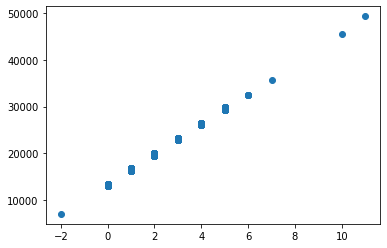

In [48]:
plt.scatter(datos.bedrooms,Ypred)

#Estimacion del Modelo con multiples dummies


In [34]:
# Un extra. Calculo del numero de observaciones por barrio usando groupby
departamentosCABA.groupby(by='l3').agg(['count'])['index']

,count
l3,
b'Agronom\xeda',37
b'Constituci\xf3n',130
b'Las Ca\xf1itas',379
b'Nu\xf1ez',1145
b'San Nicol\xe1s',322
b'Villa Pueyrred\xf3n',246
Abasto,163
Almagro,1406
Balvanera,698


## Construccion de dummies para una variable categorica de manera automatizada

In [36]:
dummiesbarrios=pd.get_dummies(departamentosCABA.l3, prefix='dum')
dummiesbarrios

,dum_b'Agronom\xeda',dum_b'Constituci\xf3n',dum_b'Las Ca\xf1itas',dum_b'Nu\xf1ez',dum_b'San Nicol\xe1s',dum_b'Villa Pueyrred\xf3n',dum_Abasto,dum_Almagro,dum_Balvanera,dum_Barracas,dum_Barrio Norte,dum_Belgrano,dum_Boca,dum_Boedo,dum_Caballito,dum_Catalinas,dum_Centro / Microcentro,dum_Chacarita,dum_Coghlan,dum_Colegiales,dum_Congreso,dum_Flores,dum_Floresta,dum_Liniers,dum_Mataderos,dum_Monserrat,dum_Monte Castro,dum_Once,dum_Palermo,dum_Parque Avellaneda,dum_Parque Centenario,dum_Parque Chacabuco,dum_Parque Chas,dum_Parque Patricios,dum_Paternal,dum_Pompeya,dum_Puerto Madero,dum_Recoleta,dum_Retiro,dum_Saavedra,dum_San Cristobal,dum_San Telmo,dum_Tribunales,dum_Velez Sarsfield,dum_Versalles,dum_Villa Crespo,dum_Villa Devoto,dum_Villa General Mitre,dum_Villa Lugano,dum_Villa Luro,dum_Villa Ortuzar,dum_Villa Real,dum_Villa Riachuelo,dum_Villa Santa Rita,dum_Villa Urquiza,dum_Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50649,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
dummiesbarrios.columns

Index(['dum_b'Agronom\xeda'', 'dum_b'Constituci\xf3n'',
       'dum_b'Las Ca\xf1itas'', 'dum_b'Nu\xf1ez'', 'dum_b'San Nicol\xe1s'',
       'dum_b'Villa Pueyrred\xf3n'', 'dum_Abasto', 'dum_Almagro',
       'dum_Balvanera', 'dum_Barracas', 'dum_Barrio Norte', 'dum_Belgrano',
       'dum_Boca', 'dum_Boedo', 'dum_Caballito', 'dum_Catalinas',
       'dum_Centro / Microcentro', 'dum_Chacarita', 'dum_Coghlan',
       'dum_Colegiales', 'dum_Congreso', 'dum_Flores', 'dum_Floresta',
       'dum_Liniers', 'dum_Mataderos', 'dum_Monserrat', 'dum_Monte Castro',
       'dum_Once', 'dum_Palermo', 'dum_Parque Avellaneda',
       'dum_Parque Centenario', 'dum_Parque Chacabuco', 'dum_Parque Chas',
       'dum_Parque Patricios', 'dum_Paternal', 'dum_Pompeya',
       'dum_Puerto Madero', 'dum_Recoleta', 'dum_Retiro', 'dum_Saavedra',
       'dum_San Cristobal', 'dum_San Telmo', 'dum_Tribunales',
       'dum_Velez Sarsfield', 'dum_Versalles', 'dum_Villa Crespo',
       'dum_Villa Devoto', 'dum_Villa General 

In [37]:
departamentosCABA=pd.concat([departamentosCABA, dummiesbarrios],axis=1)

#Estimacion del Modelo con dummys




In [62]:
resultados=regress(['price', 'bedrooms','dum_Liniers', 'dum_Mataderos', 'dum_Monserrat', 'dum_Monte Castro',
       'dum_Once', 'dum_Palermo', 'dum_Parque Avellaneda',
       'dum_Parque Centenario', 'dum_Parque Chacabuco', 'dum_Parque Chas',
       'dum_Parque Patricios', 'dum_Paternal', 'dum_Pompeya',
       'dum_Puerto Madero', 'dum_Recoleta', 'dum_Retiro', 'dum_Saavedra',
       'dum_San Cristobal', 'dum_San Telmo', 'dum_Tribunales',
       'dum_Velez Sarsfield', 'dum_Versalles', 'dum_Villa Crespo',
       'dum_Villa Devoto', 'dum_Villa General Mitre', 'dum_Villa Lugano',
       'dum_Villa Luro', 'dum_Villa Ortuzar', 'dum_Villa Real',
       'dum_Villa Riachuelo', 'dum_Villa Santa Rita', 'dum_Villa Urquiza'],departamentosCABA)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     19.31
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          5.36e-111
Time:                        21:44:58   Log-Likelihood:            -2.1586e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19347   BIC:                         4.321e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

#Estimacion del Modelo Multivariado

Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*surface+\epsilon_i$

In [56]:
regress(['price', 'bedrooms'],departamentosCABA)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     560.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          3.09e-122
Time:                        21:06:37   Log-Likelihood:            -2.1590e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19379   BIC:                         4.318e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.313e+04    259.177     50.675      0.0

In [50]:
regress(['price', 'surface_to'],departamentosCABA)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     66.70
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           3.27e-16
Time:                        20:53:06   Log-Likelihood:            -3.7416e+05
No. Observations:               33472   AIC:                         7.483e+05
Df Residuals:                   33470   BIC:                         7.483e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.825e+04    101.752    179.337      0.0

In [54]:
regress(['price', 'bedrooms','surface_to'],departamentosCABA)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     281.5
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          3.10e-121
Time:                        21:05:09   Log-Likelihood:            -2.1590e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.313e+04    259.172     50.670      0.0

In [55]:
departamentos[['bedrooms','surface_to']].corr()

,bedrooms,surface_to
bedrooms,1.000000,0.185127
surface_to,0.185127,1.000000
